#### Import

In [1]:
pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 99.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [2]:
import pandas as pd
import keras
import matplotlib.pyplot as plt

In [3]:
# data is stored in google drive folder so import drive to notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import random
#random.seed(0)

import numpy as np
#np.random.seed(0)

import tensorflow as tf
#tf.random.set_seed(0)

##GEN DATASET (valutazione GAN)

#### Classi maggiori

In [ ]:
#Aggiungere labels e solo dopo unire tutti i gen
dfBenign = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBuono/genBenign.csv')
dfPortscan = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBuono/genPortscan.csv')
dfDoS = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBuono/genDoS.csv')
dfDDoS = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBuono/genDDoS.csv')

#### CSV classi minori con valori minimi

In [ ]:
dfBruteforce = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBuono/Bruteforce/genBruteforce_pochiNuovi.csv')
dfBotnet = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBuono/Botnet/genBotnet_pochiNuovi.csv')

#### CSV con 10000 samples x classi minori

In [5]:
dfBruteforce = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBuono/Bruteforce/genBruteforce_10000.csv')
dfBotnet = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/GANgen/Valutazione/tentativo3/setHBuono/Botnet/genBotnet_10000.csv')

#### Resto...TUTTE CLASSI

In [ ]:
#rows_to_drop = range(2000)
#df_dropped_Botnet = dfBotnet.drop(rows_to_drop)

# Display the DataFrame after dropping rows
#print(df_dropped_Botnet.shape)

#dfBotnet=df_dropped_Botnet

In [ ]:
dfBenign['L_BENIGN'] = 1
dfPortscan['L_Infiltration_Portscan'] = 1
dfDoS['L_DoS'] = 1
dfDDoS['L_DDoS'] = 1
dfBruteforce['L_BruteForce'] = 1
dfBotnet['L_Botnet'] = 1

dfBenign['L_Infiltration_Portscan'] = 0
dfBenign['L_DoS'] = 0
dfBenign['L_DDoS'] = 0
dfBenign['L_BruteForce'] = 0
dfBenign['L_Botnet'] = 0

dfPortscan['L_BENIGN'] = 0
dfPortscan['L_DoS'] = 0
dfPortscan['L_DDoS'] = 0
dfPortscan['L_BruteForce'] = 0
dfPortscan['L_Botnet'] = 0

dfDoS['L_BENIGN'] = 0
dfDoS['L_Infiltration_Portscan'] = 0
dfDoS['L_DDoS'] = 0
dfDoS['L_BruteForce'] = 0
dfDoS['L_Botnet'] = 0

dfDDoS['L_BENIGN'] = 0
dfDDoS['L_Infiltration_Portscan'] = 0
dfDDoS['L_DoS'] = 0
dfDDoS['L_BruteForce'] = 0
dfDDoS['L_Botnet'] = 0

dfBruteforce['L_BENIGN'] = 0
dfBruteforce['L_Infiltration_Portscan'] = 0
dfBruteforce['L_DoS'] = 0
dfBruteforce['L_DDoS'] = 0
dfBruteforce['L_Botnet'] = 0

dfBotnet['L_BENIGN'] = 0
dfBotnet['L_Infiltration_Portscan'] = 0
dfBotnet['L_DoS'] = 0
dfBotnet['L_DDoS'] = 0
dfBotnet['L_BruteForce'] = 0

In [ ]:
merged_df = pd.concat([dfBenign, dfPortscan, dfDoS, dfDDoS, dfBruteforce, dfBotnet], axis=0, ignore_index=True)

In [ ]:
merged_df.shape

(1484419, 41)

In [ ]:
col_labels = ['L_BENIGN', 'L_Infiltration_Portscan', 'L_DoS', 'L_DDoS', 'L_BruteForce', 'L_Botnet']
y_train = merged_df[['L_BENIGN','L_Infiltration_Portscan','L_DDoS','L_DoS','L_BruteForce','L_Botnet']]
X_train = merged_df.drop(columns=col_labels)

In [ ]:
print("Samples per classe GEN")
print((merged_df['L_BENIGN']==1).values.sum())
print((merged_df['L_Infiltration_Portscan']==1).values.sum())
print((merged_df['L_DoS']==1).values.sum())
print((merged_df['L_DDoS']==1).values.sum())
print((merged_df['L_BruteForce']==1).values.sum())
print((merged_df['L_Botnet']==1).values.sum())

Samples per classe GEN
1116095
161597
120134
66593
10000
10000


In [ ]:
X_train.shape

(1484419, 35)

In [ ]:
merged_df_final = merged_df
from sklearn.utils import shuffle
merged_df_final = shuffle(merged_df_final).reset_index()
merged_df_final = merged_df_final.drop("index", axis=1) #elimino colonna indice creata dal reset_index

In [ ]:
merged_df_final.shape

(1484419, 41)

#### Resto...SOLO CLASSI MINORI

In [6]:
dfBruteforce['L_BruteForce'] = 1
dfBotnet['L_Botnet'] = 1

dfBruteforce['L_BENIGN'] = 0
dfBruteforce['L_Infiltration_Portscan'] = 0
dfBruteforce['L_DoS'] = 0
dfBruteforce['L_DDoS'] = 0
dfBruteforce['L_Botnet'] = 0

dfBotnet['L_BENIGN'] = 0
dfBotnet['L_Infiltration_Portscan'] = 0
dfBotnet['L_DoS'] = 0
dfBotnet['L_DDoS'] = 0
dfBotnet['L_BruteForce'] = 0

In [7]:
merged_df = pd.concat([dfBruteforce, dfBotnet], axis=0, ignore_index=True)
merged_df.shape

(20000, 41)

In [8]:
col_labels = ['L_BENIGN', 'L_Infiltration_Portscan', 'L_DoS', 'L_DDoS', 'L_BruteForce', 'L_Botnet']
y_train = merged_df[['L_BENIGN','L_Infiltration_Portscan','L_DDoS','L_DoS','L_BruteForce','L_Botnet']]
X_train = merged_df.drop(columns=col_labels)
X_train.shape

(20000, 35)

In [9]:
print("Samples per classe GEN")
print((merged_df['L_BENIGN']==1).values.sum())
print((merged_df['L_Infiltration_Portscan']==1).values.sum())
print((merged_df['L_DoS']==1).values.sum())
print((merged_df['L_DDoS']==1).values.sum())
print((merged_df['L_BruteForce']==1).values.sum())
print((merged_df['L_Botnet']==1).values.sum())

Samples per classe GEN
0
0
0
0
10000
10000


In [10]:
merged_df_final = merged_df
from sklearn.utils import shuffle
merged_df_final = shuffle(merged_df_final).reset_index()
merged_df_final = merged_df_final.drop("index", axis=1) #elimino colonna indice creata dal reset_index

##REAL+GEN DATASET - DATA AUGMENTATION

In [11]:
X_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/improved/Pre-processed_versions/terzoPreprocessing/X_train_35.csv')
y_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/improved/Pre-processed_versions/terzoPreprocessing/y_train_35.csv')

print(X_train.shape)
print(y_train.shape)

(1469838, 35)
(1469838, 6)


In [12]:
dfReal = pd.concat([X_train, y_train], axis=1)

In [13]:
dfReal.shape

(1469838, 41)

In [14]:
print(dfReal.shape)
print(merged_df_final.shape)

(1469838, 41)
(20000, 41)


In [15]:
merged_df_complete = pd.concat([dfReal, merged_df_final], axis=0, ignore_index=True)
print(merged_df_complete.shape)

(1489838, 41)


In [16]:
merged_df_complete = shuffle(merged_df_complete).reset_index()
merged_df_complete = merged_df_complete.drop("index", axis=1) #elimino colonna indice creata dal reset_index

In [17]:
col_labels = ['L_BENIGN', 'L_Infiltration_Portscan', 'L_DoS', 'L_DDoS', 'L_BruteForce', 'L_Botnet']
y_train = merged_df_complete[['L_BENIGN','L_Infiltration_Portscan','L_DDoS','L_DoS','L_BruteForce','L_Botnet']]
X_train = merged_df_complete.drop(columns=col_labels)

In [18]:
print("Samples per classe X_TRAIN")
print((dfReal['L_BENIGN']==1).values.sum())
print((dfReal['L_Infiltration_Portscan']==1).values.sum())
print((dfReal['L_DoS']==1).values.sum())
print((dfReal['L_DDoS']==1).values.sum())
print((dfReal['L_BruteForce']==1).values.sum())
print((dfReal['L_Botnet']==1).values.sum())
print("====================================")
print("Samples per classe GEN")
print((merged_df_final['L_BENIGN']==1).values.sum())
print((merged_df_final['L_Infiltration_Portscan']==1).values.sum())
print((merged_df_final['L_DoS']==1).values.sum())
print((merged_df_final['L_DDoS']==1).values.sum())
print((merged_df_final['L_BruteForce']==1).values.sum())
print((merged_df_final['L_Botnet']==1).values.sum())
print("====================================")
print("Samples per classe X_TRAIN+GEN")
print((merged_df_complete['L_BENIGN']==1).values.sum())
print((merged_df_complete['L_Infiltration_Portscan']==1).values.sum())
print((merged_df_complete['L_DoS']==1).values.sum())
print((merged_df_complete['L_DDoS']==1).values.sum())
print((merged_df_complete['L_BruteForce']==1).values.sum())
print((merged_df_complete['L_Botnet']==1).values.sum())

Samples per classe X_TRAIN
1116095
161597
120134
66593
4904
515
Samples per classe GEN
0
0
0
0
10000
10000
Samples per classe X_TRAIN+GEN
1116095
161597
120134
66593
14904
10515


In [19]:
X_train.shape

(1489838, 35)

In [20]:
y_train.shape

(1489838, 6)

## REAL DATASET

In [ ]:
X_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/improved/Pre-processed_versions/terzoPreprocessing/X_train_35.csv')
y_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/improved/Pre-processed_versions/terzoPreprocessing/y_train_35.csv')

print(X_train.shape)
print(y_train.shape)

(1469838, 35)
(1469838, 6)


In [ ]:
#result = pd.concat([X_train, y_train], axis=1)
#result.shape
#result['L_BENIGN'].value_counts()

```
(1469838, 41)

BENIGN                   1116095
Infiltration_Portscan     161597
DoS                       120134
DDoS                       66593
BruteForce                  4904
Botnet                       515
```

## TEST DATASET

In [21]:
X_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/improved/Pre-processed_versions/terzoPreprocessing/X_test_35.csv')
y_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/progettoTesi/Dataset2017/improved/Pre-processed_versions/terzoPreprocessing/y_test_35.csv')

print(X_test.shape)
print(y_test.shape)

(629931, 35)
(629931, 6)


In [22]:
df_test = pd.concat([X_test, y_test], axis=1)

```
(629931, 41)

BENIGN                    478327
Infiltration_Portscan      69256
DoS                        51486
DDoS                       28540
BruteForce                  2101
Botnet                       221
```

## preparo array

In [23]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1489838, 35), (1489838, 6), (629931, 35), (629931, 6))

# **Architettura IDS**

### Vecchi

#### Vecchia versione architettura modello

In [ ]:
l_r = 0.0005 #@param

In [ ]:
# build the classifier model
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

#def baseline_model():
  # create model
model = Sequential()
model.add(Dense(64, input_dim=35, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=l_r), metrics=['accuracy'])

#### Nuova versione architettura modello per riferimento valutazione
Fonte: https://ijece.iaescore.com/index.php/IJECE/article/view/26968/16288


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Define the model
model = Sequential()
model.add(InputLayer(input_shape=(35,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(72, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=l_r),
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Recall()])

#### Nuova versione (2) architettura modello per riferimento valutazione
Fonte: 10.1109/MILCOM47813.2019.9020824

### ***GIUSTA*** - Nuova versione (3) architettura modello per riferimento valutazione
Fonte: 10.3390/app13127328


In [25]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Dense(64, input_dim=35, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01))) #il paper si confonde e dà due valori: 0.001 e 0.01
model.add(Dense(6, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2304      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
Total params: 35782 (139.77 KB)
Trainable params: 35782 (139.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Cross-Validation section

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics


def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=35, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(6, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_clf = KerasClassifier(build_fn=create_model, epochs=300, batch_size=1024, verbose=0)
cv_scores = cross_val_score(model_clf, X_train, y_train, cv=5, scoring='f1_macro', verbose=0)

print("Cross-Validation Scores F1 MACRO:", cv_scores)
print("Average Cross-Validation F1 MACRO:", np.mean(cv_scores))

# **Training**


In [26]:
e = 300 #@param
v_split = 0.20 #@param
pat_earlyStop = 20 #@param
train_batch_size = 1024 #@param
lr = 0.001

Definisco un validation set migliore, più bilanciato...

In [27]:
from sklearn.model_selection import train_test_split

X_combined = X_train
y_combined = y_train

X_train, X_val, y_train, y_val = train_test_split(
    X_combined, y_combined, test_size=v_split, random_state=3, stratify=y_combined
)

In [28]:
print(X_train.shape)
print(X_val.shape)

(1191870, 35)
(297968, 35)


#### Class Weighting

In [29]:
#Cerco di capire se l'imbalanced classes mi da problemi di TROPPA BRAVURA del DNN ==> eseguo class Weighting
from sklearn.utils.class_weight import compute_class_weight

class_values = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(class_values), y=class_values)
class_weight_dict = dict(zip(np.unique(class_values), class_weights))

In [30]:
print(class_values)
print(class_weights)

[0 0 0 ... 0 0 0]
[ 0.2224777   1.53657235  3.72874198  2.066915   16.66065588 23.61447932]


#### Train

In [31]:
from keras.callbacks import EarlyStopping

# Use EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=pat_earlyStop, restore_best_weights=True)

history = model.fit(X_train, y_train,  batch_size=train_batch_size, epochs=e, verbose=2, validation_data=(X_val, y_val), callbacks=[early_stopping]) #class_weight=class_weight_dict
#
#

Epoch 1/300
1164/1164 - 8s - 7ms/step - accuracy: 0.9240 - loss: 0.6484 - val_accuracy: 0.9604 - val_loss: 0.3494
Epoch 2/300
1164/1164 - 2s - 2ms/step - accuracy: 0.9613 - loss: 0.3266 - val_accuracy: 0.9595 - val_loss: 0.3119
Epoch 3/300
1164/1164 - 2s - 2ms/step - accuracy: 0.9623 - loss: 0.2983 - val_accuracy: 0.9615 - val_loss: 0.2918
Epoch 4/300
1164/1164 - 2s - 2ms/step - accuracy: 0.9628 - loss: 0.2817 - val_accuracy: 0.9626 - val_loss: 0.2744
Epoch 5/300
1164/1164 - 2s - 2ms/step - accuracy: 0.9631 - loss: 0.2700 - val_accuracy: 0.9635 - val_loss: 0.2636
Epoch 6/300
1164/1164 - 2s - 2ms/step - accuracy: 0.9635 - loss: 0.2606 - val_accuracy: 0.9635 - val_loss: 0.2588
Epoch 7/300
1164/1164 - 2s - 2ms/step - accuracy: 0.9638 - loss: 0.2528 - val_accuracy: 0.9643 - val_loss: 0.2485
Epoch 8/300
1164/1164 - 2s - 2ms/step - accuracy: 0.9642 - loss: 0.2465 - val_accuracy: 0.9642 - val_loss: 0.2460
Epoch 9/300
1164/1164 - 2s - 2ms/step - accuracy: 0.9645 - loss: 0.2409 - val_accuracy: 

# **Valutazione**

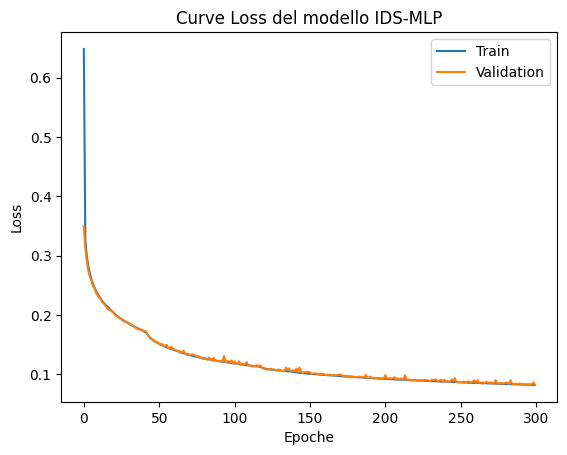

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Curve Loss del modello IDS-MLP')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

#salva in Drive
images_dir = '/content/drive/MyDrive/Colab Notebooks/progettoTesi/grafici_pdf/IDS_MLP_DAGan/20EsperimentiSetHBuono'
plt.savefig(f"{images_dir}/IDS-MLP_GraficoLosses_DAGan_setHBuono_senzaCW13.pdf", dpi=200, format='pdf')


plt.show()

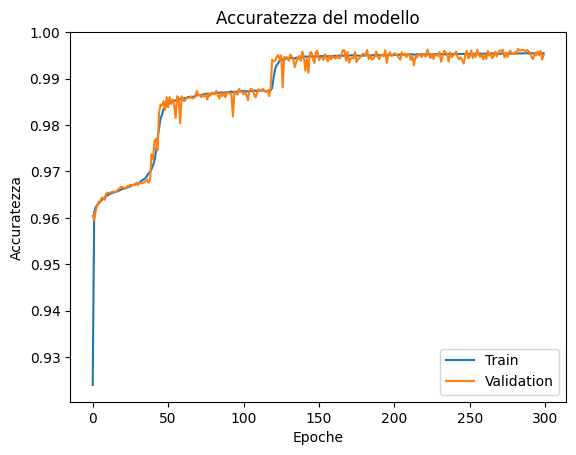

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuratezza del modello')
plt.xlabel('Epoche')
plt.ylabel('Accuratezza')
plt.legend(['Train', 'Validation'], loc='lower right')

#salva in Drive
plt.savefig(f"{images_dir}/IDS-MLP_GraficoAccuratezza__DAGan_setHBuono_senzaCW13.pdf", dpi=200, format='pdf')

plt.show()

In [34]:
eval_result  = model.evaluate(X_test, y_test, verbose=2, batch_size=512) #The model evaluates the test dataset in batches to save memory and computational resources.

# Get loss and accuracy from the evaluation result
loss = eval_result[0]
accuracy = eval_result[1]

print("======================================")
print(f"Test Loss: {eval_result[0]}")
print(f"Test Accuracy: {eval_result[1]}")

1231/1231 - 2s - 2ms/step - accuracy: 0.9954 - loss: 0.0786
Test Loss: 0.07862906157970428
Test Accuracy: 0.9953740835189819


In [35]:
# predictions // number of times the model classified an input as each class

# import numpy for argmax function // returns the max value on an axis... index with max value is predicted class
import numpy as np

y_prediction = model.predict(X_test)
y_pred_classes= np.argmax(y_prediction, axis=1)

19686/19686 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step


In [36]:
df_y_pred_classes = pd.DataFrame(y_pred_classes)
df_y_pred_classes.value_counts()

,count
0,
0,478265
1,69929
3,50863
2,28470
4,2137
5,267


In [37]:
y_test_rounded = np.argmax(y_test, axis=1)

The balanced accuracy score is designed to address the issue of class imbalance. It calculates the average accuracy for each class and then computes the mean of these per-class accuracies

In [38]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score

balanced_accuracy = balanced_accuracy_score(y_test_rounded, y_pred_classes)
print('Balanced Accuracy:', balanced_accuracy)
accuracy = accuracy_score(y_test_rounded, y_pred_classes)
print('Accuracy:', accuracy)

Balanced Accuracy: 0.9913879534256438
Accuracy: 0.9953740965280324


In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("ZERO_DIVISION=0")
precision = precision_score(y_test_rounded, y_pred_classes, average='weighted', zero_division=0)
print('Precision: %f' % precision)
m_precision = precision_score(y_test_rounded, y_pred_classes, average='macro', zero_division=0)
print('Macro Precision: %f' % m_precision)
print("======================")
recall = recall_score(y_test_rounded, y_pred_classes, average='weighted', zero_division=0)
print('Recall: %f' % recall)
m_recall = recall_score(y_test_rounded, y_pred_classes, average='macro', zero_division=0)
print('Macro Recall: %f' % m_recall)
print("=======================")
f1 = f1_score(y_test_rounded, y_pred_classes, average='weighted', zero_division=0)
print('F1 score: %f' % f1)
m_f1 = f1_score(y_test_rounded, y_pred_classes, average='macro', zero_division=0)
print('Macro F1 score: %f' % m_f1)

ZERO_DIVISION=0
Precision: 0.995399
Macro Precision: 0.960874
Recall: 0.995374
Macro Recall: 0.991388
F1 score: 0.995378
Macro F1 score: 0.974762


In [40]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_test_rounded, y_pred_classes, average=None, zero_division=0)
print('Precision per class:', precision)
print('Recall per class:', recall)
print('F1 score per class:', f1)

Precision per class: [0.99732784 0.98416966 0.99634703 0.99384621 0.96958353 0.82397004]
Recall per class: [0.99719857 0.99373339 0.99390329 0.9818203  0.98619705 0.99547511]
F1 score per class: [0.9972632  0.9889284  0.99512366 0.98779666 0.97781973 0.90163934]


In [41]:
# import plotting function and confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn

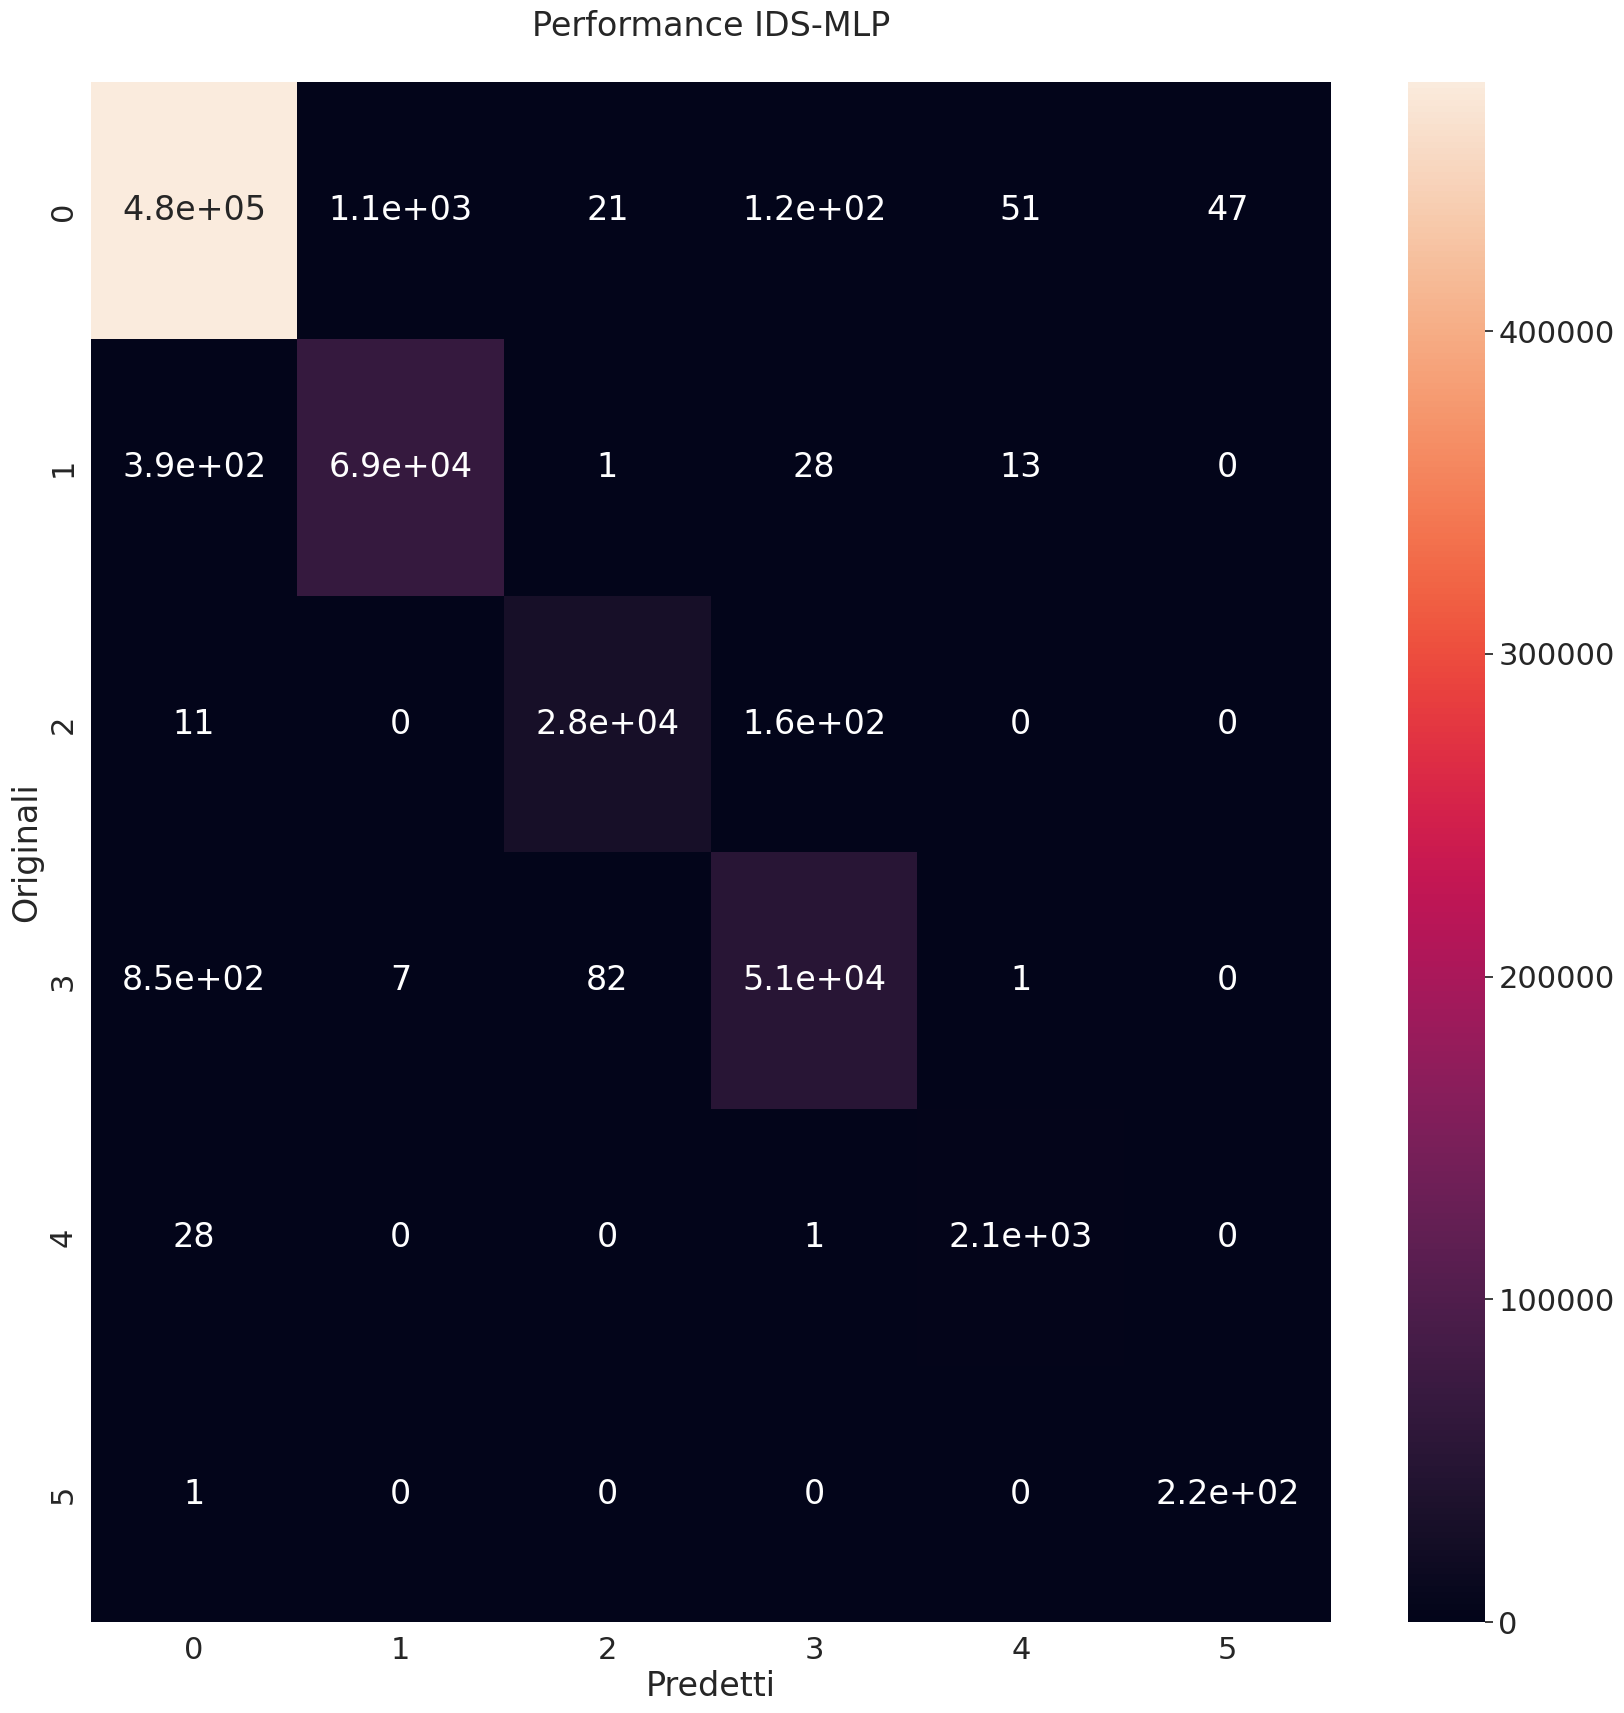

In [42]:
labels = [0, 1, 2, 3, 4, 5]

confusion_mat = confusion_matrix(y_test_rounded, y_pred_classes, labels=labels)

sn.set(font_scale=2)

plt.figure(figsize = (20,20))
s = sn.heatmap(confusion_mat, annot = True)#, cmap = 'Blues',fmt='.2f'

s.set_xlabel('Predetti')
s.set_ylabel('Originali')

plt.title("Performance IDS-MLP\n")

#salva in Drive
plt.savefig(f"{images_dir}/IDS-MLP_ConfusionMatrix__DAGan_setHBuono_senzaCW13.pdf", dpi=200, format='pdf') #ClassWeighting

plt.show()